#               Zomato Data Analysis: Regression, Classification, and Clustering

# Importing Libraires

In [926]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [927]:
df = pd.read_csv('zomato.csv')

# Data Cleaning & EDA

In [928]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [929]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [930]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [931]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#Creating_new_column_final_rating

In [932]:
df['final_rating']=df['rate'].str[:3]

#Dropping_irrelevant_columns

In [933]:
df=df.drop(['url','address','phone','reviews_list','menu_item','rate'],axis=1)

#Dropping_Nan_values

In [934]:
df.dropna(inplace=True)
df

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),final_rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200",Pubs and bars,Whitefield,3.8
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000",Pubs and bars,Whitefield,3.9
51708,Keys Cafe - Keys Hotel,No,No,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200",Pubs and bars,Whitefield,2.8
51711,Bhagini,No,No,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield,2.5


In [935]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
final_rating                   0
dtype: int64

#Replacing_the_values

In [936]:
df['final_rating'] = df['final_rating'].replace(['NEW'], [0])

df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',', '')

df['final_rating'].replace('-',0,inplace=True)

#Changing_datatype_of_column

In [937]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype({'approx_cost(for two people)':'float64'})

df['votes']=df['votes'].astype({'votes':'int'})

df['final_rating']=df['final_rating'].astype({'final_rating':'float64'})

#Removing duplicates

In [515]:
df_analysis=df.drop_duplicates(subset=["name","location"])

#Top_10_Resturants_with_more_outlets

In [516]:
different_outlet_count=df_analysis['name'].value_counts()[:10]
different_outlet_count

Domino's Pizza               27
Pizza Hut                    26
KFC                          25
Faasos                       24
McDonald's                   22
Empire Restaurant            18
Burger King                  17
A2B - Adyar Ananda Bhavan    17
Beijing Bites                17
Subway                       16
Name: name, dtype: int64

# Top 10 Restaurants

[Text(0.5, 1.0, 'Top 10 Restaurants')]

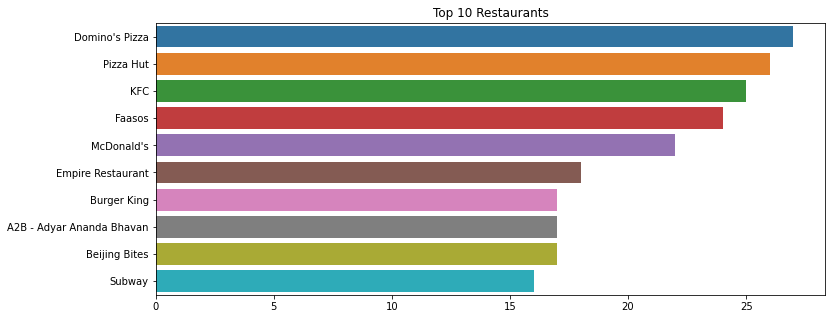

In [517]:
plt.figure(figsize=(12,5))
sns.barplot(y=different_outlet_count.index,x=different_outlet_count.values).set(title='Top 10 Restaurants')

# Top_10_area_with_more_restaurants

In [518]:
different_area_count=df_analysis['location'].value_counts()[:10]
different_area_count

Indiranagar              309
Whitefield               298
HSR                      274
Marathahalli             224
BTM                      192
JP Nagar                 189
Jayanagar                185
Koramangala 5th Block    174
Electronic City          159
Bannerghatta Road        129
Name: location, dtype: int64

[Text(0.5, 1.0, 'Top 10 Area with more restaurants')]

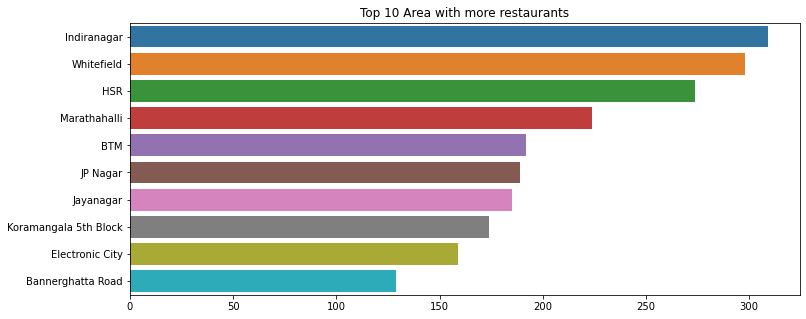

In [519]:
plt.figure(figsize=(12,5))
sns.barplot(y=different_area_count.index,x=different_area_count.values).set(title='Top 10 Area with more restaurants')

# Various_Types_Of_Restaurants

[Text(0.5, 1.0, 'Various Type of Restaurants')]

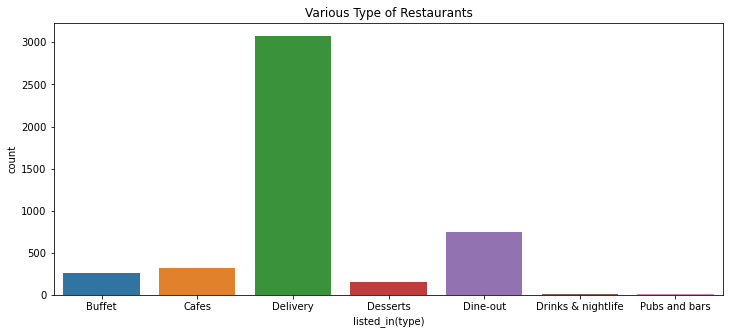

In [520]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_analysis,x='listed_in(type)').set(title='Various Type of Restaurants')

# Bookings_availability_Count

[Text(0.5, 1.0, 'Booking Availability Count')]

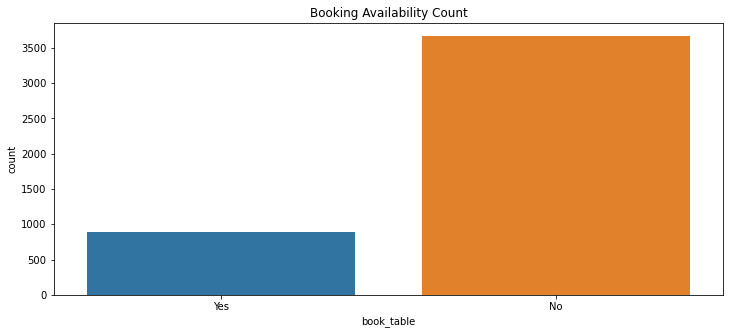

In [521]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_analysis,x='book_table').set(title='Booking Availability Count')

# Stats_For_Online_Order

<AxesSubplot:xlabel='online_order', ylabel='count'>

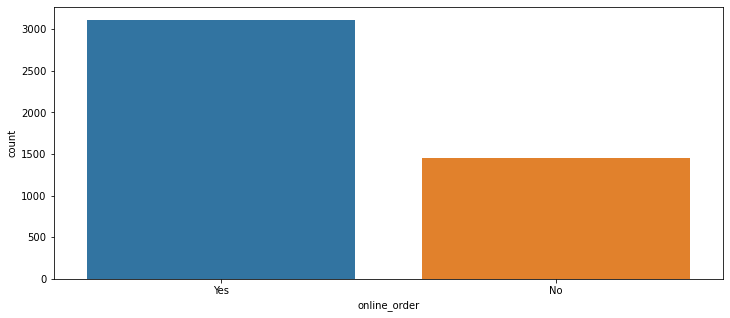

In [522]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_analysis,x='online_order')

# Top 5 Resturants for top 5 area

In [523]:
top_5_area=different_area_count.index[:5]
top_5_area=top_5_area.to_list()
top_5_area

['Indiranagar', 'Whitefield', 'HSR', 'Marathahalli', 'BTM']

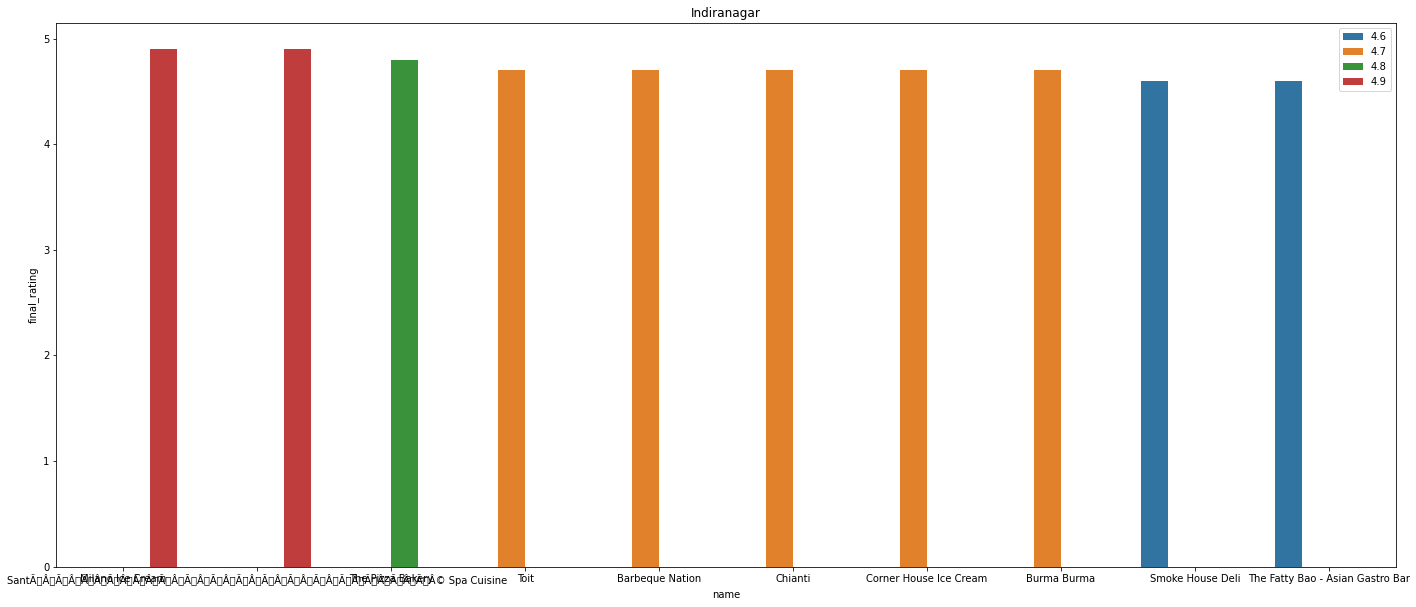

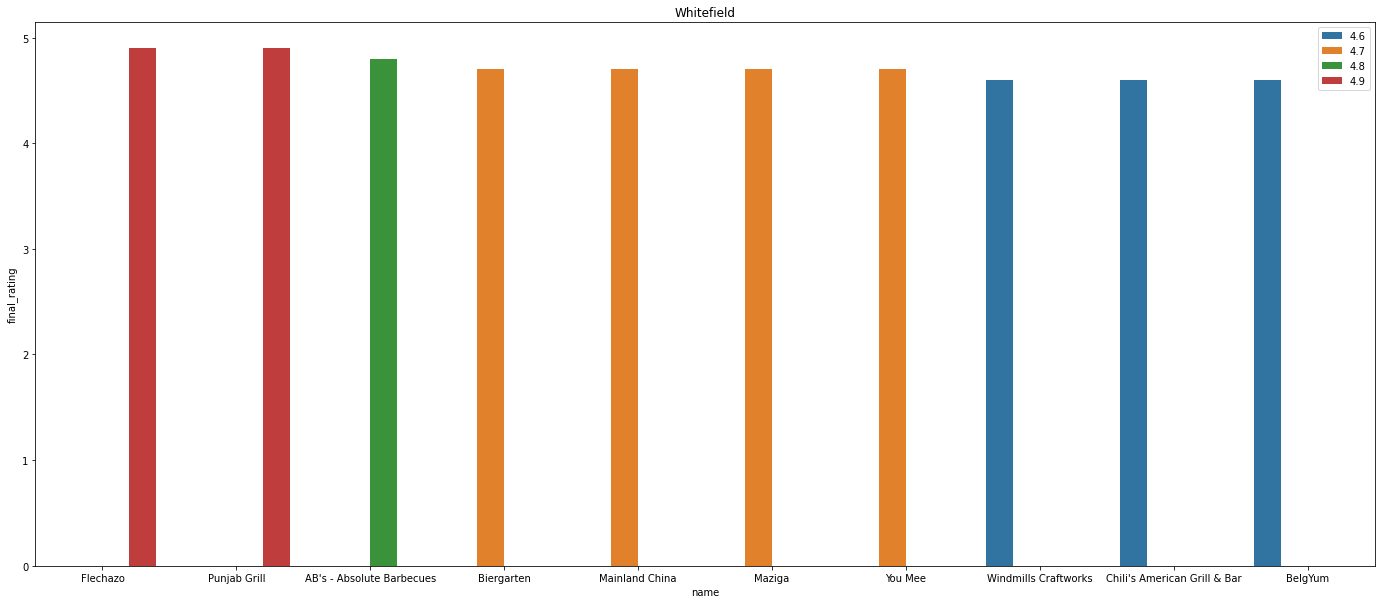

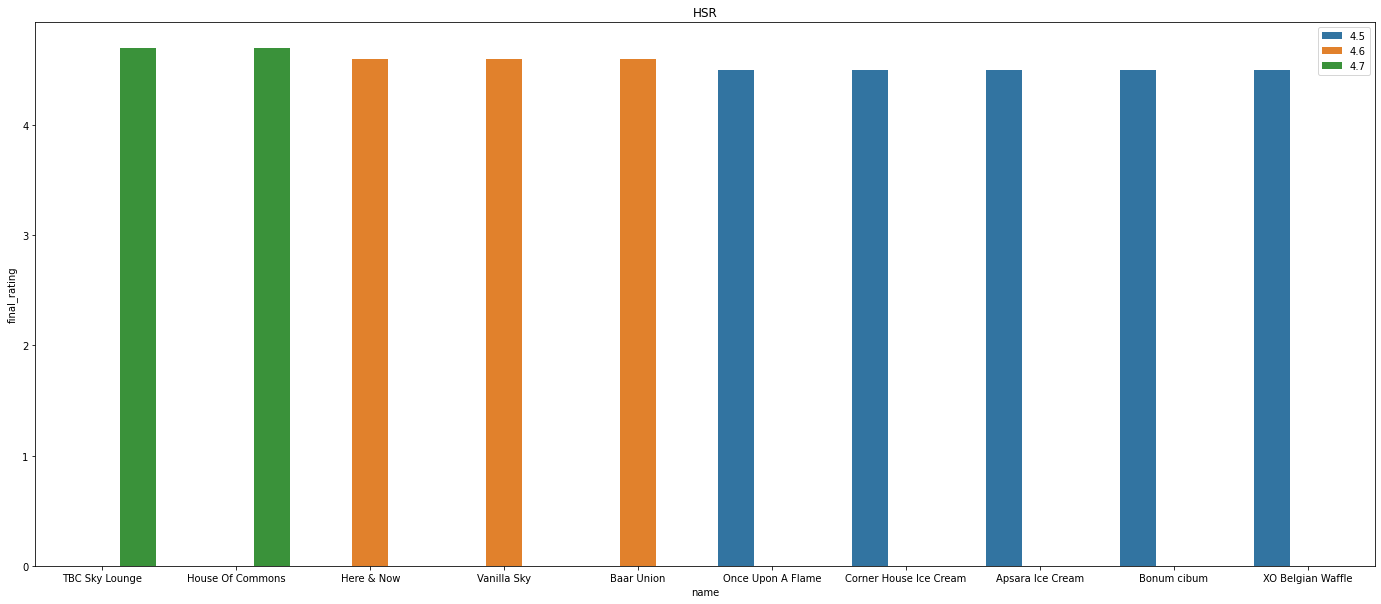

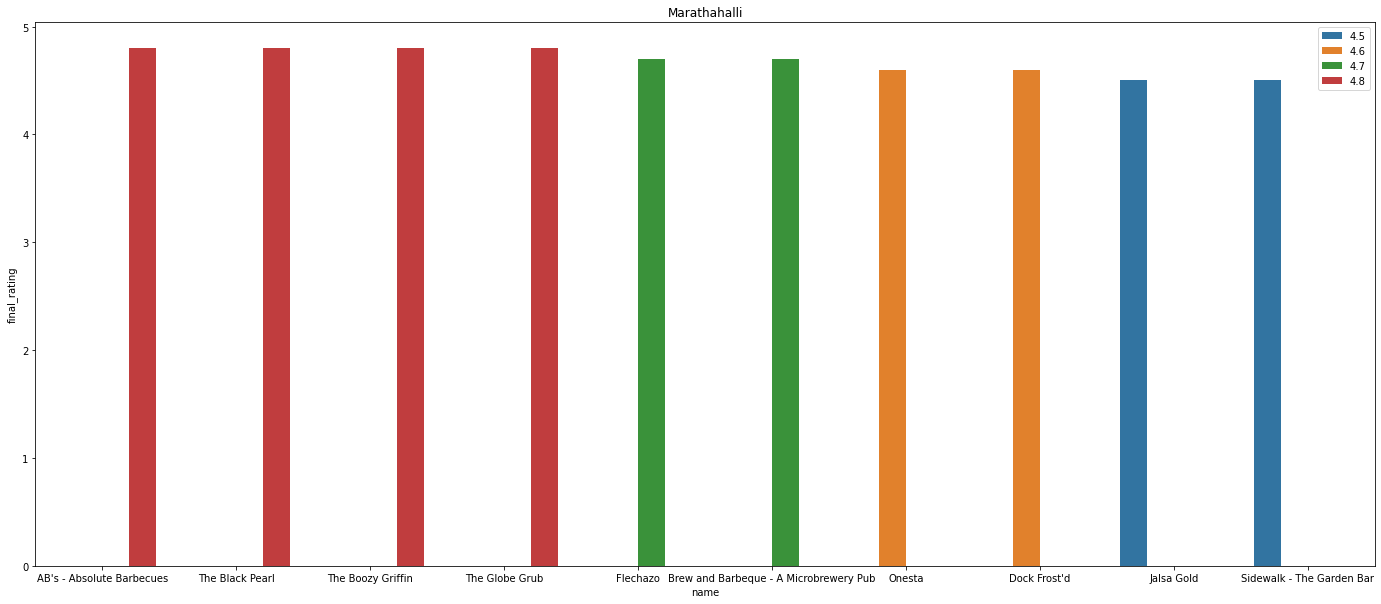

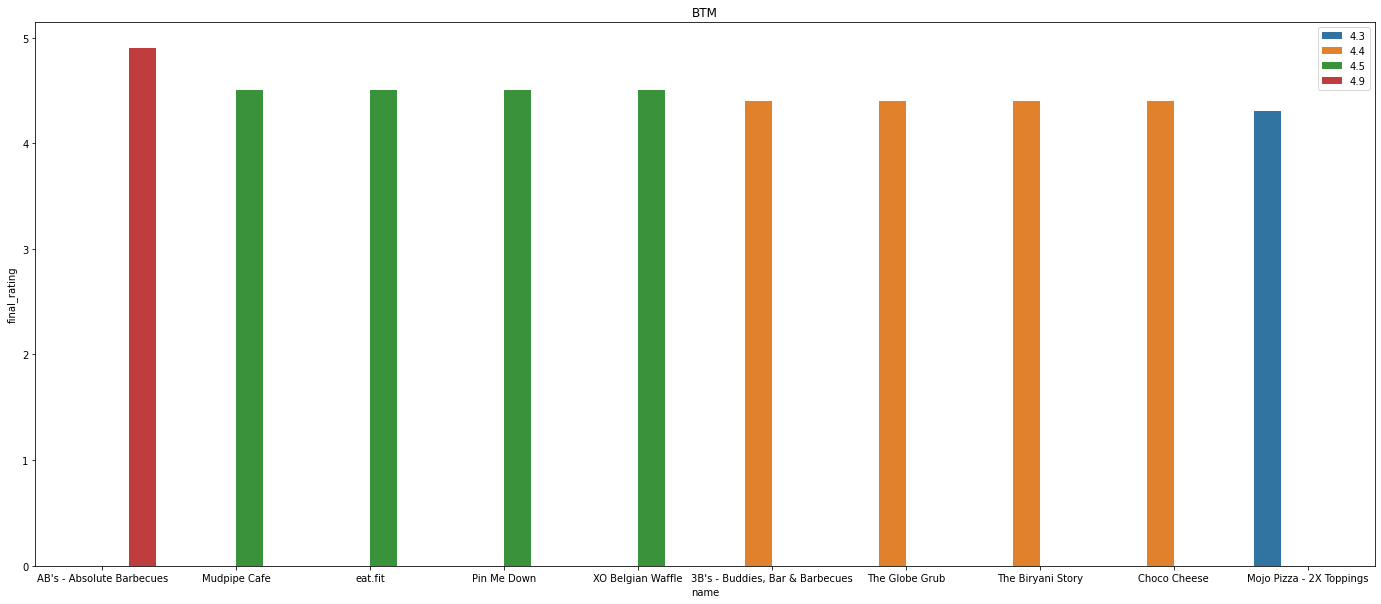

In [524]:
for location in top_5_area:    
    restaurants=df_analysis.loc[df['location'] == location].sort_values(by = ['final_rating','votes'], ascending = False)[:10]
    plt.figure(figsize=(24,10))
    sns.barplot(data=restaurants.astype({'final_rating':'float64'}),x='name',y='final_rating',hue='final_rating').set(title=location)
    plt.legend(loc='upper right')
    

# Top 5 Dish Liked

In [525]:
dishes=df_analysis['dish_liked'].to_list()
dishes=pd.DataFrame(dishes,columns=['dish_liked'])
dishes
dishes=dishes.dropna()

In [526]:
from itertools import chain
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

In [527]:
food = pd.DataFrame({
                    'dish_liked': chainer(dishes['dish_liked'])})

In [528]:
food['dish_liked']=food['dish_liked'].str.strip()
top_5_food=food['dish_liked'].value_counts()[:5]
top_5_food

Pasta        495
Burgers      488
Biryani      430
Pizza        408
Cocktails    361
Name: dish_liked, dtype: int64

[Text(0.5, 1.0, 'Top 5 Food Liked')]

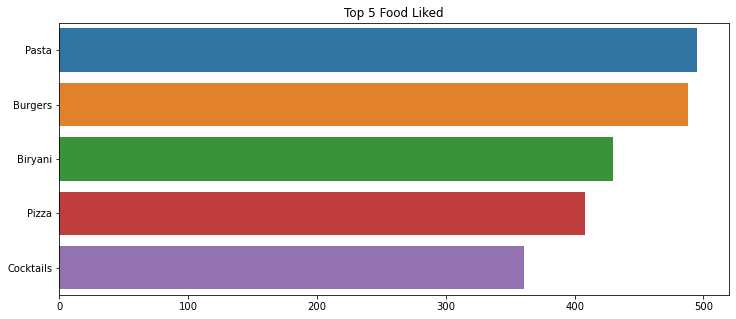

In [529]:
plt.figure(figsize=(12,5))
sns.barplot(y=top_5_food.index,x=top_5_food.values).set(title='Top 5 Food Liked')

# Top 5 Cuisines

In [530]:
cuisines=df_analysis['cuisines'].dropna()
cuisines=df_analysis['cuisines'].to_list()
cuisines=pd.DataFrame(cuisines,columns=['cuisines'])
cuisines=cuisines.dropna()

In [531]:
cuisines= pd.DataFrame({
                    'cuisines': chainer(cuisines['cuisines'])})
cuisines

,cuisines
0,North Indian
1,Mughlai
2,Chinese
3,Chinese
4,North Indian
...,...
12413,Momos
12414,Andhra
12415,South Indian
12416,Chinese


In [532]:
cuisines['cuisines']=cuisines['cuisines'].str.strip()

In [533]:
cuisines['cuisines'].unique()

array(['North Indian', 'Mughlai', 'Chinese', 'Thai', 'Cafe', 'Mexican',
       'Italian', 'South Indian', 'Rajasthani', 'Pizza', 'Continental',
       'Momos', 'Beverages', 'Fast Food', 'American', 'French',
       'European', 'Burger', 'Biryani', 'Street Food', 'Rolls',
       'Ice Cream', 'Desserts', 'Andhra', 'Healthy Food', 'Salad',
       'Asian', 'Korean', 'Indonesian', 'Japanese', 'Goan', 'Seafood',
       'Kebab', 'Steak', 'Sandwich', 'Bakery', 'Vietnamese', 'Juices',
       'Arabian', 'BBQ', 'Mangalorean', 'Tea', 'Afghani', 'Finger Food',
       'Tibetan', 'Mithai', 'Middle Eastern', 'Mediterranean', 'Bengali',
       'Charcoal Chicken', 'Kerala', 'Oriya', 'Bihari', 'Roast Chicken',
       'Bohri', 'African', 'Lebanese', 'Hyderabadi', 'Belgian',
       'South American', 'Maharashtrian', 'Konkan', 'Chettinad', 'Wraps',
       'Turkish', 'Coffee', 'Iranian', 'Lucknowi', 'Gujarati', 'Tex-Mex',
       'Modern Indian', 'Spanish', 'Malaysian', 'Burmese', 'Sushi',
       'Portuguese'

In [534]:
top_5_cuisines=cuisines['cuisines'].value_counts()[:5]


[Text(0.5, 1.0, 'Top 5 Cuisines')]

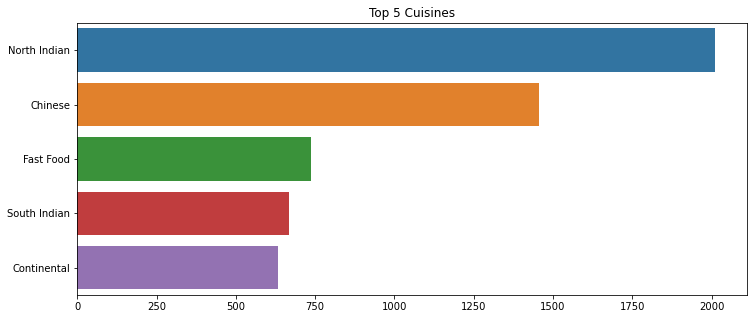

In [535]:
plt.figure(figsize=(12,5))
sns.barplot(y=top_5_cuisines.index,x=top_5_cuisines.values).set(title='Top 5 Cuisines')

# Stats for rating

In [536]:
split_rating=[((df_analysis['final_rating']>=1) & (df_analysis['final_rating']<2)).sum(),
        ((df_analysis['final_rating']>=2) & (df_analysis['final_rating']<3)).sum(),
        ((df_analysis['final_rating']>=3) & (df_analysis['final_rating']<4)).sum(),
        (df_analysis['final_rating']>=4).sum()
        ]

In [537]:
labels=['1<rate<2','2<rate<3','3<rate<4','>4']

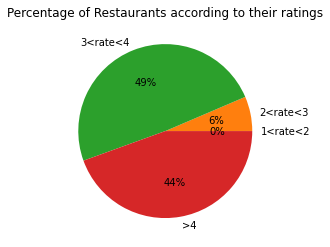

In [538]:
plt.pie(split_rating, labels=labels, autopct='%1.0f%%')
plt.title("Percentage of Restaurants according to their ratings")
plt.show()

#Economical_Restaurants_in_top_5_areas

In [539]:
restaurants_above_4=df_analysis[(df_analysis['final_rating']>=3.5)&(df_analysis['approx_cost(for two people)']<=800)&(700>=df_analysis['votes'] )& (500<=df_analysis['votes'])]

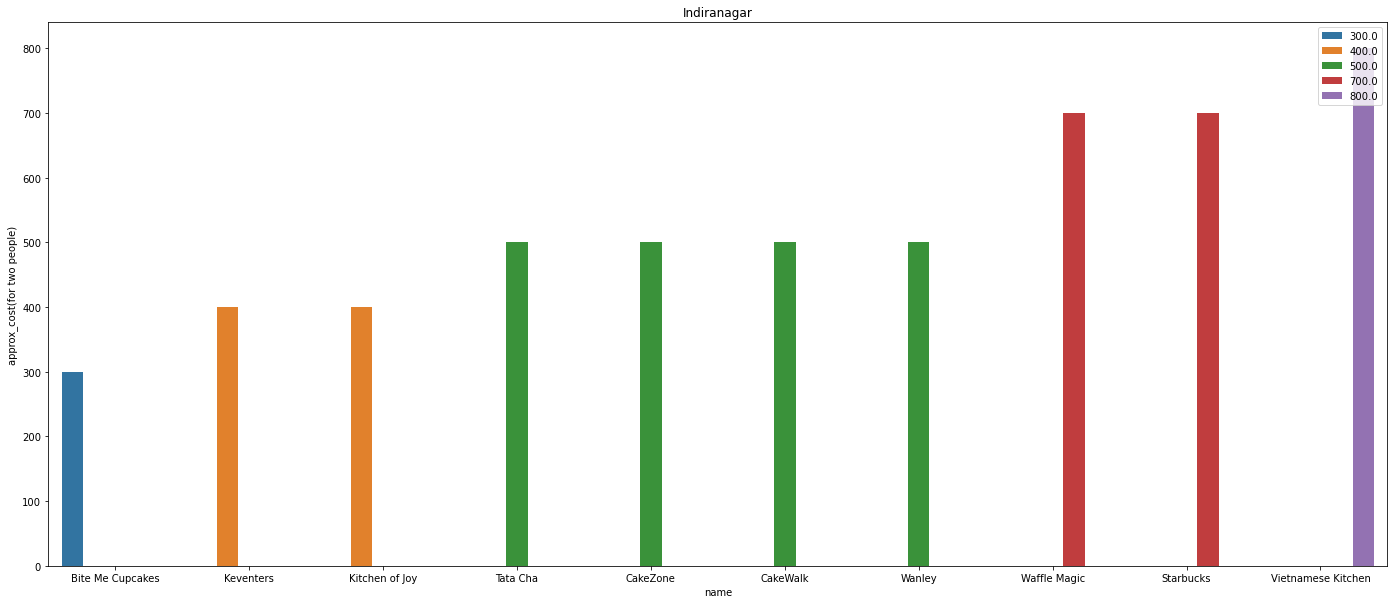

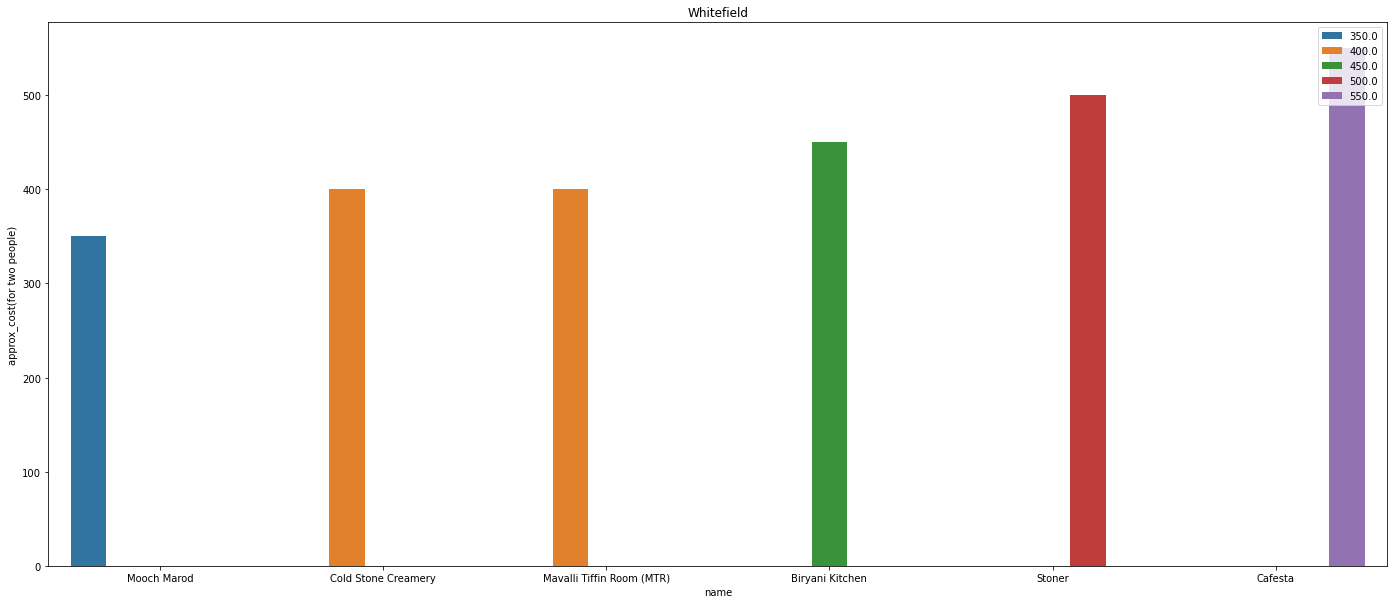

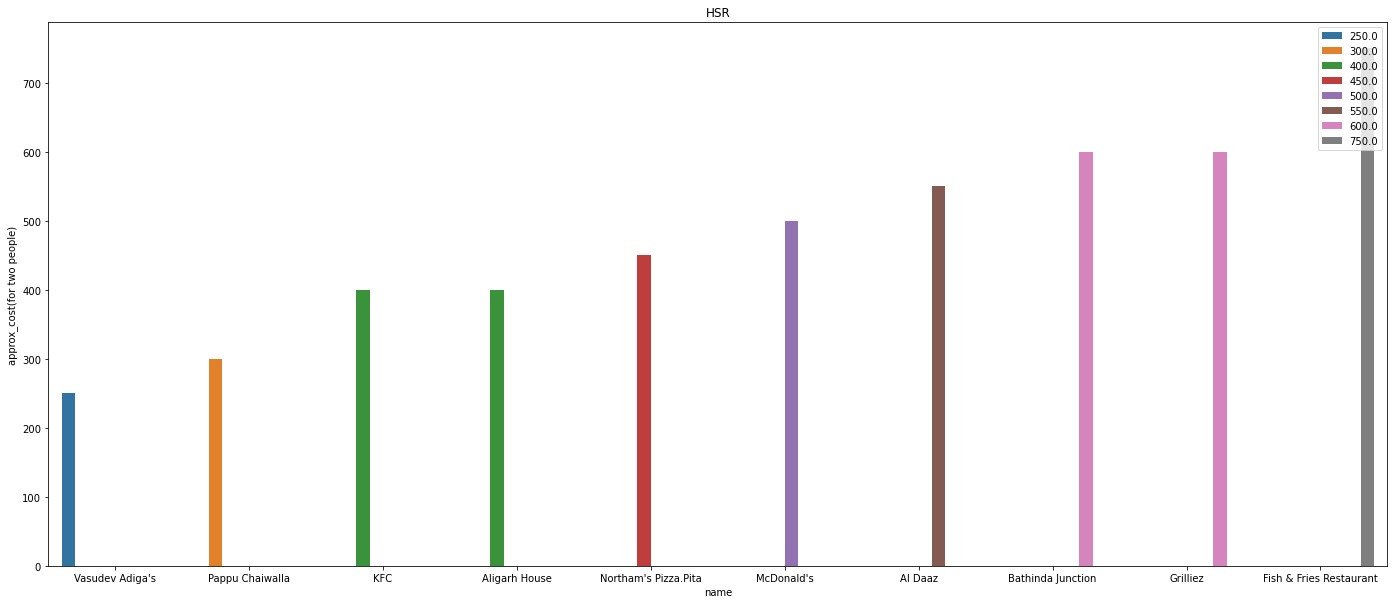

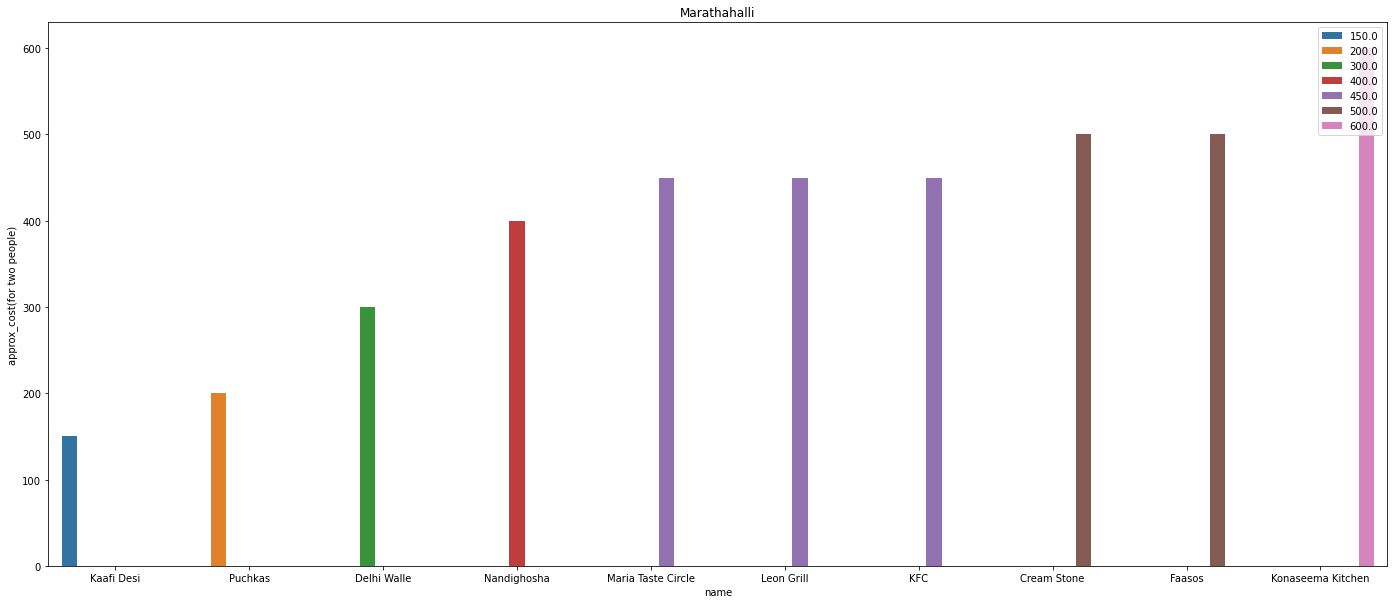

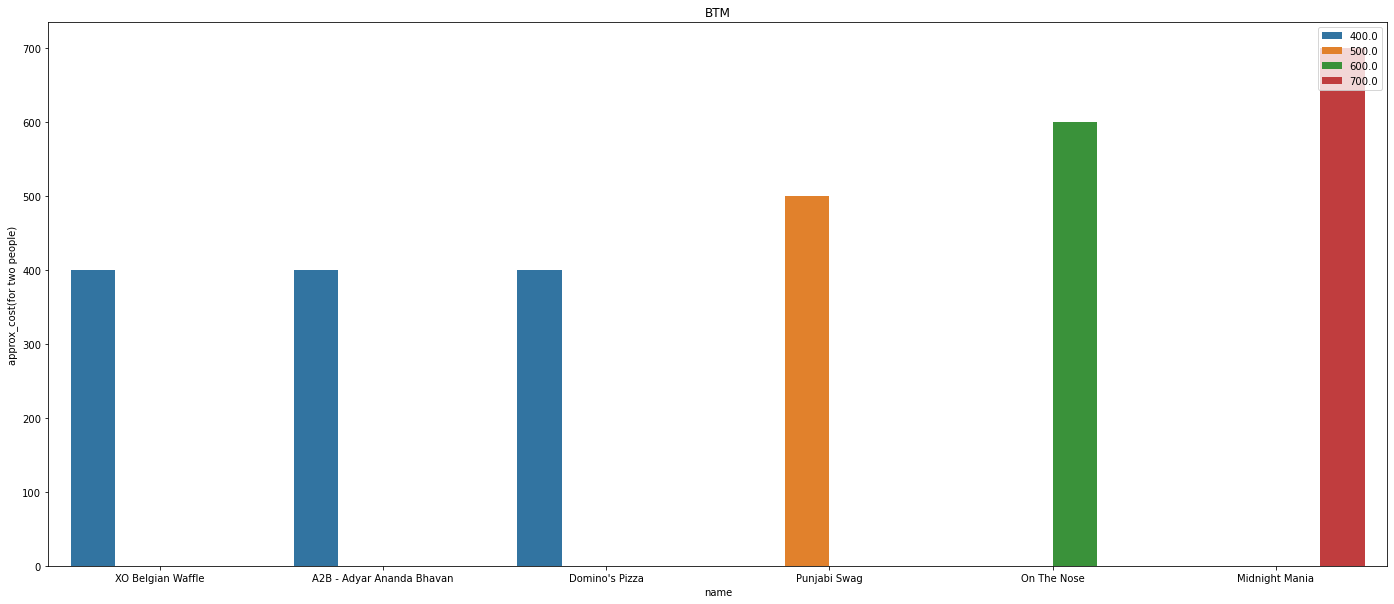

In [540]:
for location in top_5_area:    
    economical_hotels=restaurants_above_4.loc[restaurants_above_4['location'] == location].sort_values(by = ['approx_cost(for two people)'], ascending =[True])[:10]
    plt.figure(figsize=(24,10))
    sns.barplot(data=economical_hotels.astype({'approx_cost(for two people)':'float64'}),x='name',y='approx_cost(for two people)',hue='approx_cost(for two people)').set(title=location)
    plt.legend(loc='upper right')

# Feature Extraction

#Creating_two_columns_based_on_existing_column

In [541]:
def count(x):
    return len(x.split(','))

In [542]:
df['total_cuisines'] = df['cuisines'].astype(str).apply(count)

In [543]:
df['multiple_restaurant_type'] = df['rest_type'].astype(str).apply(count)

In [544]:
df

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),final_rating,total_cuisines,multiple_restaurant_type
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.1,3,1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,4.1,3,1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.8,3,2
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,3.7,2,1
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,3.8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,Pubs and bars,Whitefield,3.8,3,2
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,Pubs and bars,Whitefield,3.9,1,2
51708,Keys Cafe - Keys Hotel,No,No,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,Pubs and bars,Whitefield,2.8,3,2
51711,Bhagini,No,No,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,Whitefield,2.5,4,2


# Data Preprocessing

# Preprocessing_for_Regression_Model


# Converting_categorical_into_numerical

In [545]:
df_reg=df.drop(['name','dish_liked','rest_type','cuisines','location'],axis=1)

In [546]:
df_reg

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),listed_in(city),final_rating,total_cuisines,multiple_restaurant_type
0,Yes,Yes,775,800.0,Buffet,Banashankari,4.1,3,1
1,Yes,No,787,800.0,Buffet,Banashankari,4.1,3,1
2,Yes,No,918,800.0,Buffet,Banashankari,3.8,3,2
3,No,No,88,300.0,Buffet,Banashankari,3.7,2,1
4,No,No,166,600.0,Buffet,Banashankari,3.8,2,1
...,...,...,...,...,...,...,...,...,...
51705,Yes,Yes,128,1200.0,Pubs and bars,Whitefield,3.8,3,2
51707,No,No,77,2000.0,Pubs and bars,Whitefield,3.9,1,2
51708,No,No,161,1200.0,Pubs and bars,Whitefield,2.8,3,2
51711,No,No,81,800.0,Pubs and bars,Whitefield,2.5,4,2


#Importing_Label_Encoder

In [547]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [548]:
list1=['online_order','book_table','listed_in(city)','listed_in(type)']

In [549]:
for i in list1:
    df_reg[i]=le.fit_transform(df[i])

In [550]:
df_reg.head()

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),listed_in(city),final_rating,total_cuisines,multiple_restaurant_type
0,1,1,775,800.0,0,1,4.1,3,1
1,1,0,787,800.0,0,1,4.1,3,1
2,1,0,918,800.0,0,1,3.8,3,2
3,0,0,88,300.0,0,1,3.7,2,1
4,0,0,166,600.0,0,1,3.8,2,1


# Feature Selection and Feature Scaling

# Feature_Scaling

In [551]:
from sklearn.preprocessing import StandardScaler

In [552]:
X = df_reg.iloc[:, df_reg.columns!='final_rating']
y = df_reg['final_rating'].to_frame()

In [553]:
X.dtypes

online_order                     int32
book_table                       int32
votes                            int32
approx_cost(for two people)    float64
listed_in(type)                  int32
listed_in(city)                  int32
total_cuisines                   int64
multiple_restaurant_type         int64
dtype: object

In [554]:
X

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),listed_in(city),total_cuisines,multiple_restaurant_type
0,1,1,775,800.0,0,1,3,1
1,1,0,787,800.0,0,1,3,1
2,1,0,918,800.0,0,1,3,2
3,0,0,88,300.0,0,1,2,1
4,0,0,166,600.0,0,1,2,1
...,...,...,...,...,...,...,...,...
51705,1,1,128,1200.0,6,29,3,2
51707,0,0,77,2000.0,6,29,1,2
51708,0,0,161,1200.0,6,29,3,2
51711,0,0,81,800.0,6,29,4,2


In [555]:
column = list(X.columns.values)

In [556]:
X=StandardScaler().fit_transform(X)

In [557]:
X = pd.DataFrame(X, columns=column)

In [558]:
X

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),listed_in(city),total_cuisines,multiple_restaurant_type
0,0.650408,1.676547,0.156089,0.086126,-2.239289,-1.631561,0.101508,-0.485186
1,0.650408,-0.596464,0.166891,0.086126,-2.239289,-1.631561,0.101508,-0.485186
2,0.650408,-0.596464,0.284804,0.086126,-2.239289,-1.631561,0.101508,2.061063
3,-1.537497,-0.596464,-0.462279,-0.874666,-2.239289,-1.631561,-0.615852,-0.485186
4,-1.537497,-0.596464,-0.392072,-0.298191,-2.239289,-1.631561,-0.615852,-0.485186
...,...,...,...,...,...,...,...,...
23401,0.650408,1.676547,-0.426275,0.854759,2.486842,1.798553,0.101508,2.061063
23402,-1.537497,-0.596464,-0.472180,2.392027,2.486842,1.798553,-1.333213,2.061063
23403,-1.537497,-0.596464,-0.396572,0.854759,2.486842,1.798553,0.101508,2.061063
23404,-1.537497,-0.596464,-0.468580,0.086126,2.486842,1.798553,0.818868,2.061063


# Feature_Selection

#Importing_Libraries

In [559]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression,SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [560]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [561]:
def feature_selection(variable_counts, score_function):
    selection_model = SelectKBest(score_func=score_function,k=variable_counts)
    selection = selection_model.fit(X_train , Y_train.values.ravel())
    features_selected = X_train.columns[selection.get_support()]
    X_train_selected = selection_model.fit_transform(X_train,Y_train.values.ravel())
    reg = LinearRegression()
    reg.fit(X_train_selected,Y_train.values.ravel())
    Y_pred = reg.predict(X_test[features_selected])
    return mean_squared_error(Y_test,Y_pred)

In [562]:
rmse_df = pd.DataFrame({'features count':[],'rmse':[]})
function_name= [mutual_info_regression]

In [563]:
for j in range(len(function_name)):
    func = function_name[j]
    for i in range(1,len(df_reg.columns)-1):
        rmse = feature_selection(i,func)
        new_record ={'features count':round(i),'rmse':rmse}
        rmse_df = rmse_df.append(new_record,ignore_index=True)

In [564]:
print(rmse_df)

   features count      rmse
0             1.0  0.285562
1             2.0  0.281287
2             3.0  0.278694
3             4.0  0.278657
4             5.0  0.279016
5             6.0  0.279689
6             7.0  0.278192


# Regression Model

# 1. Linear regression Model

In [565]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg=LinearRegression()

In [566]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [567]:
print(lin_reg.score(X_train,Y_train))
print(lin_reg.score(X_test,Y_test))

0.14793551329024968
0.12856485487015867


In [568]:
lin_reg_pred=lin_reg.predict(X_test)

In [569]:
lin_reg_score=r2_score(Y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 12.856485487015867


# 2. Ridge Regression

In [570]:
from sklearn.linear_model import Ridge

In [571]:
ridge_reg=Ridge()

In [572]:
ridge_reg.fit(X_train,Y_train)

Ridge()

In [573]:
print(ridge_reg.score(X_train,Y_train))
print(ridge_reg.score(X_test,Y_test))

0.14793551308793473
0.12856430659354523


In [574]:
ridge_reg_pred=ridge_reg.predict(X_test)

In [575]:
ridge_reg_score=r2_score(Y_test,ridge_reg_pred)*100
print("Accuracy score for RidgeR :",ridge_reg_score)

Accuracy score for RidgeR : 12.856430659354523


# 3. Lasso Regression

In [576]:
from sklearn.linear_model import Lasso

In [577]:
lasso_reg=Lasso()

In [578]:
lasso_reg.fit(X_train,Y_train)

Lasso()

In [579]:
print(lasso_reg.score(X_train,Y_train))
print(lasso_reg.score(X_test,Y_test))

0.0
-0.001118460901439633


In [580]:
lasso_reg_pred=lasso_reg.predict(X_test)

In [581]:
lasso_reg_score=r2_score(Y_test,lasso_reg_pred)*100
print("Accuracy score for LR :",lasso_reg_score)

Accuracy score for LR : -0.1118460901439633


# 4. Random Regression

In [582]:
from sklearn.ensemble import RandomForestRegressor

In [583]:
random_forest_reg=RandomForestRegressor()

In [584]:
random_forest_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [585]:
print(random_forest_reg.score(X_train,Y_train))
print(random_forest_reg.score(X_test,Y_test))

0.9740481796639551
0.8101530761356469


In [586]:
random_forest_reg_pred=random_forest_reg.predict(X_test)

In [587]:
random_forest_reg_score=r2_score(Y_test,random_forest_reg_pred)*100
print("Accuracy score for LR :",random_forest_reg_score)

Accuracy score for LR : 81.01530761356469


# 5. Support Vector Regression

In [588]:
from sklearn.svm import SVR

In [589]:
svr=SVR()
svr.fit(X_train,Y_train)

SVR()

In [590]:
print(svr.score(X_train,Y_train))
print(svr.score(X_test,Y_test))

0.224736114230642
0.16732983883933117


In [591]:
svr_pred=svr.predict(X_test)

In [592]:
svr_score=r2_score(Y_test,svr_pred)*100
print("Accuracy score for LR :",svr_score)

Accuracy score for LR : 16.732983883933116


In [593]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg_score,ridge_reg_score,lasso_reg_score,random_forest_reg_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,12.856485
1,Ridge Reg,12.856431
2,Lasso Reg,-0.111846
3,RandomForest Reg,81.015308
4,Support Vector Reg,16.732984


# Classification:

In [594]:
threshold = 4
df_reg['target'] = df_reg['final_rating'].apply(lambda x:1 if x >= threshold else 0)

In [595]:
df_reg.head()

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),listed_in(city),final_rating,total_cuisines,multiple_restaurant_type,target
0,1,1,775,800.0,0,1,4.1,3,1,1
1,1,0,787,800.0,0,1,4.1,3,1,1
2,1,0,918,800.0,0,1,3.8,3,2,0
3,0,0,88,300.0,0,1,3.7,2,1,0
4,0,0,166,600.0,0,1,3.8,2,1,0


In [596]:
#Checking data balance

In [597]:
df_reg['target'].value_counts()

1    11917
0    11489
Name: target, dtype: int64

In [598]:
df_class = df_reg.drop(['final_rating'],axis=1)

In [599]:
df_class.head()

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),listed_in(city),total_cuisines,multiple_restaurant_type,target
0,1,1,775,800.0,0,1,3,1,1
1,1,0,787,800.0,0,1,3,1,1
2,1,0,918,800.0,0,1,3,2,0
3,0,0,88,300.0,0,1,2,1,0
4,0,0,166,600.0,0,1,2,1,0


In [600]:
X=df_class.iloc[:,df_class.columns!='target']
y = df_class['target'].to_frame()

#Feature Scaling:

In [601]:
from sklearn.preprocessing import StandardScaler

In [602]:
column = list(X.columns.values)

In [603]:
X=StandardScaler().fit_transform(X)

In [604]:
X = pd.DataFrame(X, columns=column)

In [611]:
X.head()

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),listed_in(city),total_cuisines,multiple_restaurant_type
0,0.650408,1.676547,0.156089,0.086126,-2.239289,-1.631561,0.101508,-0.485186
1,0.650408,-0.596464,0.166891,0.086126,-2.239289,-1.631561,0.101508,-0.485186
2,0.650408,-0.596464,0.284804,0.086126,-2.239289,-1.631561,0.101508,2.061063
3,-1.537497,-0.596464,-0.462279,-0.874666,-2.239289,-1.631561,-0.615852,-0.485186
4,-1.537497,-0.596464,-0.392072,-0.298191,-2.239289,-1.631561,-0.615852,-0.485186


#Splitting Train and test dataset:

In [612]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#Feature selection

In [613]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif,SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [619]:
def feature_selection(variable_counts, score_function):
    selection_model = SelectKBest(score_func=score_function,k=variable_counts)
    selection = selection_model.fit(X_train , y_train.values.ravel())
    features_selected = X_train.columns[selection.get_support()]
    X_train_selected = selection_model.fit_transform(X_train,y_train.values.ravel())
    reg = LogisticRegression()
    reg.fit(X_train_selected,y_train.values.ravel())
    Y_pred = reg.predict(X_test[features_selected])
    return accuracy_score(y_test,Y_pred)

In [628]:
accuracy_df = pd.DataFrame({'features count':[],'accuracy':[],'function_name':[]})
function_name= [f_classif,mutual_info_classif]
function_list=['f_classif','mutual_info_classif']

In [629]:
for j in range(len(function_name)):
    func = function_name[j]
    func_list = function_list[j]
    for i in range(1,len(df_class.columns)-1):
        accuracy = feature_selection(i,func)
        new_record ={'features count':round(i),'accuracy':accuracy,'function_name':func_list}
        accuracy_df = accuracy_df.append(new_record,ignore_index=True)

In [630]:
print(accuracy_df)

    features count  accuracy        function_name
0              1.0  0.652285            f_classif
1              2.0  0.718069            f_classif
2              3.0  0.721914            f_classif
3              4.0  0.727040            f_classif
4              5.0  0.724050            f_classif
5              6.0  0.722768            f_classif
6              7.0  0.724050            f_classif
7              1.0  0.705681  mutual_info_classif
8              2.0  0.657411  mutual_info_classif
9              3.0  0.721914  mutual_info_classif
10             4.0  0.719351  mutual_info_classif
11             5.0  0.720632  mutual_info_classif
12             6.0  0.723622  mutual_info_classif
13             7.0  0.721059  mutual_info_classif


#Multiple Models

In [632]:
pip install xgboost

In [636]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [637]:
models = []

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('XGBoost', XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,eval_metric='mlogloss')))

In [639]:
for name, model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)
    
    cm2 = confusion_matrix(predictions,y_test)
    print(cm2)
    
    acc = accuracy_score(predictions, y_test)
    print(acc)
    print('\n')

LogisticRegression
[[980 478]
 [175 708]]
0.7210593763348996


Naive Bayes
[[995 548]
 [160 638]]
0.6975651431012387


Random Forest
[[1078  167]
 [  77 1019]]
0.895771038017941


Decision Tree
[[1041  115]
 [ 114 1071]]
0.9021785561725758


KNN
[[909 359]
 [246 827]]
0.7415634344297309


XGBoost
[[958 371]
 [197 815]]
0.75736864587783




# Hyper Parameter Tuning

#Random Forest

In [641]:
rf = RandomForestClassifier()

In [642]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [643]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [644]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [670]:
rf = RandomForestClassifier()
param_grid = {

    'bootstrap': [True],

    'max_depth': [80, 90, 100, 110],

    'max_features': [2, 3],

    'min_samples_leaf': [3, 4, 5],

    'min_samples_split': [8, 10, 12],

    'n_estimators': [100, 200, 300, 1000]

}

In [671]:
rf_random = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [672]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [673]:
def evaluate(model, X_test,y_test):
    pred = model.predict(X_test)
    #errors = abs(pred - y_test)
    accuracy = accuracy_score(pred, y_test)
    print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [674]:
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test,y_test)

Model Performance
Accuracy = 0.90%.


In [675]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test,y_test)

Model Performance
Accuracy = 0.88%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

#Decision Tree

In [662]:
params = {
    'max_depth': [1,2, 3,4, 5, 10, 20,30,40,50,60,70,80],
    'min_samples_leaf': [5, 10, 20, 50,35,45, 100],
    'criterion': ["gini", "entropy"]
}

In [663]:
from sklearn.model_selection import GridSearchCV

In [664]:
dt = DecisionTreeClassifier()
decision_tree = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [665]:
decision_tree.fit(X_train,y_train)

Fitting 4 folds for each of 182 candidates, totalling 728 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60,
                                       70, 80],
                         'min_samples_leaf': [5, 10, 20, 50, 35, 45, 100]},
             scoring='accuracy', verbose=1)

In [666]:
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test,y_test)


Model Performance
Accuracy = 0.90%.


In [667]:
best_random = decision_tree.best_estimator_
random_accuracy = evaluate(best_random, X_test,y_test)

Model Performance
Accuracy = 0.86%.


# Clustering

In [938]:
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),final_rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,3.8


In [939]:
df_cluster = df.loc[:,['name','approx_cost(for two people)','final_rating','cuisines']]

In [940]:
df_cluster.head()

,name,approx_cost(for two people),final_rating,cuisines
0,Jalsa,800.0,4.1,"North Indian, Mughlai, Chinese"
1,Spice Elephant,800.0,4.1,"Chinese, North Indian, Thai"
2,San Churro Cafe,800.0,3.8,"Cafe, Mexican, Italian"
3,Addhuri Udupi Bhojana,300.0,3.7,"South Indian, North Indian"
4,Grand Village,600.0,3.8,"North Indian, Rajasthani"


In [941]:
df_cluster['cuisines'] = df_cluster['cuisines'].str.replace(' ','')

df_cluster['cuisines'] = df_cluster['cuisines'].str.split(',')

In [942]:
df_cluster.head()

,name,approx_cost(for two people),final_rating,cuisines
0,Jalsa,800.0,4.1,"[NorthIndian, Mughlai, Chinese]"
1,Spice Elephant,800.0,4.1,"[Chinese, NorthIndian, Thai]"
2,San Churro Cafe,800.0,3.8,"[Cafe, Mexican, Italian]"
3,Addhuri Udupi Bhojana,300.0,3.7,"[SouthIndian, NorthIndian]"
4,Grand Village,600.0,3.8,"[NorthIndian, Rajasthani]"


#One hot encoding

In [943]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

In [944]:
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),final_rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,3.8


In [945]:
df_cluster = df_cluster.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(df_cluster.pop('cuisines')),
                                                               index=df_cluster.index, columns=mlb.classes_))

In [946]:
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),final_rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,3.8


In [947]:
df_cluster.head()

,name,approx_cost(for two people),final_rating,Afghan,Afghani,African,American,Andhra,Arabian,Asian,...,StreetFood,Sushi,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,Jalsa,800.0,4.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,800.0,4.1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,San Churro Cafe,800.0,3.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,300.0,3.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,600.0,3.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


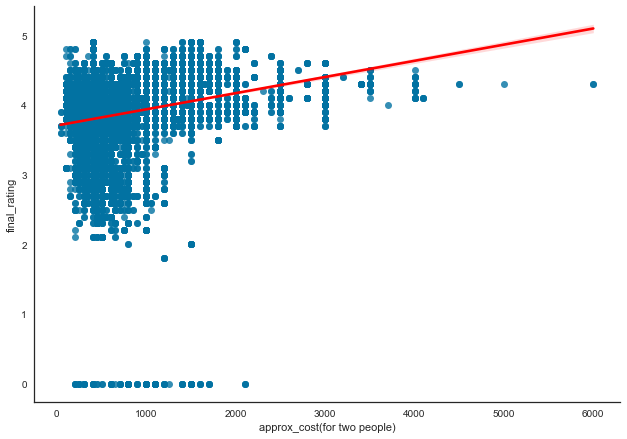

In [948]:
sns.lmplot(y='final_rating',x='approx_cost(for two people)',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

# K means Clustering

In [949]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

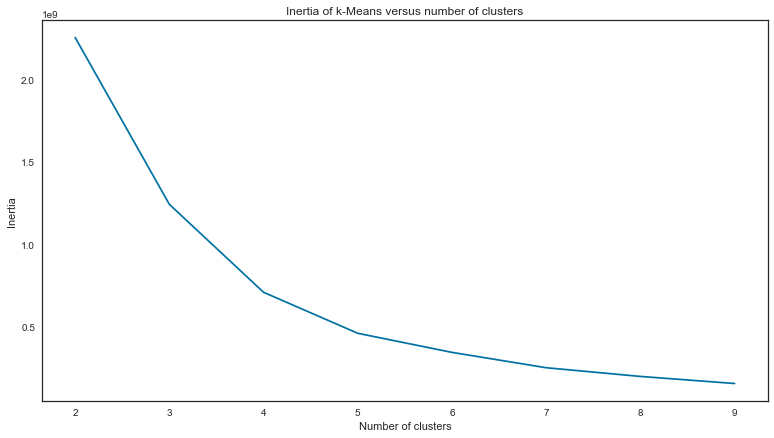

In [950]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('name',axis =1)).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [951]:
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),final_rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,3.8


In [952]:
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [953]:
cluster_lbl = model.predict(df_cluster.drop('name',axis=1))

In [954]:
df_cluster['labels'] = cluster_lbl
df_cluster.head()

,name,approx_cost(for two people),final_rating,Afghan,Afghani,African,American,Andhra,Arabian,Asian,...,Sushi,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps,labels
0,Jalsa,800.0,4.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,Spice Elephant,800.0,4.1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
2,San Churro Cafe,800.0,3.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,Addhuri Udupi Bhojana,300.0,3.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,600.0,3.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Text(0.5, 0, 'Cost')

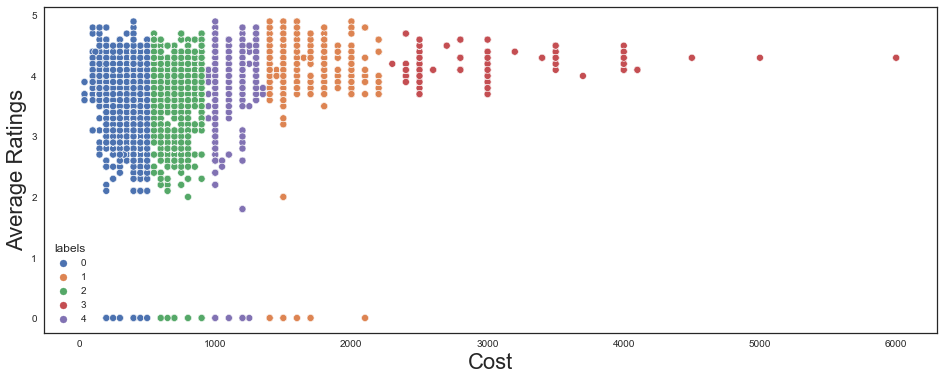

In [955]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='final_rating',x='approx_cost(for two people)',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

In [956]:
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),final_rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,3.8


In [957]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [962]:
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),final_rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,3.8


In [959]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]
cluster_0

,index,name,approx_cost(for two people),final_rating,Afghan,Afghani,African,American,Andhra,Arabian,...,Sushi,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps,labels
0,3,Addhuri Udupi Bhojana,300.0,3.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,500.0,4.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,The Coffee Shack,500.0,4.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,Caf-Eleven,450.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,T3H Cafe,300.0,3.9,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,51615,Little Onnion,500.0,3.8,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9882,51617,Breakfast House,300.0,3.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9883,51619,Hottey Smokey,500.0,3.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9884,51629,Radha Rani,400.0,3.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [960]:
# Top cuisines in each cluster
for i,d in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', d.drop(['index','name','approx_cost(for two people)','final_rating','labels'],axis=1).sum().sort_values(ascending=False)[:5],'\n')

Top cuisines in cluster 0
 NorthIndian    3876
Chinese        2675
FastFood       2352
Desserts       1828
SouthIndian    1628
dtype: int32 

Top cuisines in cluster 1
 NorthIndian    1292
Continental    1079
Chinese         660
Asian           474
Italian         429
dtype: int32 

Top cuisines in cluster 2
 NorthIndian    3118
Chinese        2858
Cafe           2202
Continental    1385
Italian        1313
dtype: int32 

Top cuisines in cluster 3
 NorthIndian    173
Chinese        119
Continental    114
Italian         85
European        76
dtype: int32 

Top cuisines in cluster 4
 NorthIndian    1657
Continental    1330
Chinese        1170
Italian         649
FingerFood      422
dtype: int32 



# Pricipal Component Analysis

In [963]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('name',axis =1))

In [964]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [965]:
X_pca = pca.fit_transform(X)

In [966]:
pca.components_

array([[-9.54155426e-03,  3.84022506e-02, -1.85547752e-03,
        -2.89553535e-04,  8.52502476e-04,  4.65736779e-02,
        -5.53217528e-02, -1.90865768e-02,  8.04233012e-04,
        -6.36740537e-04, -5.92603136e-04, -4.61713475e-03,
         5.83534028e-02, -5.45650353e-05,  2.27068347e-04,
        -3.83123530e-03,  1.45707813e-01, -2.70628395e-04,
        -1.44567187e-01,  2.32578287e-04,  9.68208961e-05,
         7.13968770e-04,  1.13832086e-01, -4.81477711e-04,
         2.86156560e-01, -1.24632655e-04, -2.22160524e-03,
        -1.14195663e-04, -5.43577371e-01,  4.89350106e-03,
         5.40363731e-02,  1.96726804e-01,  8.00996514e-03,
         1.10812379e-01, -5.97635281e-03,  3.82382160e-03,
        -2.88137288e-05,  9.73291843e-04,  2.21571220e-03,
        -4.05624779e-04,  3.72634726e-04,  2.48389431e-02,
        -7.38648685e-03,  5.26934828e-02,  1.38788121e-04,
        -7.75060119e-04,  1.60462735e-01,  7.83934010e-06,
         4.67098412e-04, -9.93453131e-04,  5.48704127e-0

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

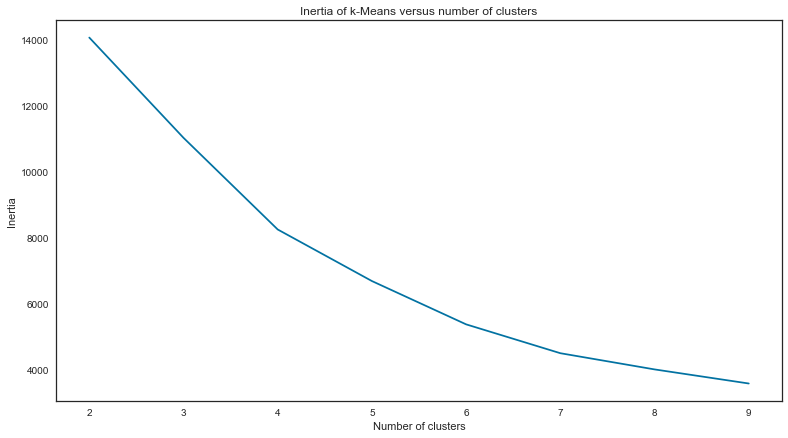

In [967]:
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores1)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [968]:
model1 = KMeans(random_state=11, n_clusters=7)
model1.fit(X_pca)

KMeans(n_clusters=7, random_state=11)

In [969]:
cluster_labels = model1.predict(X_pca)

In [970]:
df_cluster['labels'] = cluster_labels

Text(0.5, 0, 'PC1')

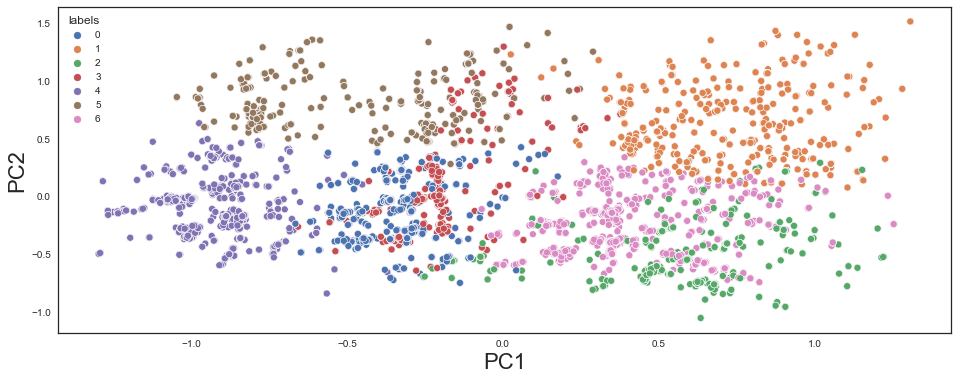

In [971]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [972]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()
df_5 = df_cluster[df_cluster['labels'] == 5].reset_index()
df_6 = df_cluster[df_cluster['labels'] == 6].reset_index()

In [973]:
list_of_df = [df_0,df_1,df_2,df_3,df_4,df_5,df_6]

In [974]:
# Most Prominent cuisines in each cluster(Top 5)
for i,d in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', d.drop(['index','name','approx_cost(for two people)','final_rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')

Top Cuisines in Cluster 0 
 NorthIndian    3680
Biryani         711
Mughlai         466
dtype: int32 

Top Cuisines in Cluster 1 
 Cafe           1970
Continental    1935
Italian        1670
dtype: int32 

Top Cuisines in Cluster 2 
 FastFood     2270
Beverages     568
Burger        473
dtype: int32 

Top Cuisines in Cluster 3 
 Chinese    1953
Momos       545
Thai        535
dtype: int32 

Top Cuisines in Cluster 4 
 NorthIndian    4465
Chinese        4465
SouthIndian    1247
dtype: int32 

Top Cuisines in Cluster 5 
 NorthIndian    1873
Continental    1760
Chinese         920
dtype: int32 

Top Cuisines in Cluster 6 
 Desserts     1789
Beverages     977
Cafe          797
dtype: int32 

